パーセプトロンの収束が保証されるのは、2つのクラスが線形分離可能で学習率が非常に小さい場合に限られる
重みの更新はステップごとに行う

In [1]:
#「esc」+[小文字のl]で行数表示
#パーセプトロンのクラスを作成
import numpy as np
"""
パーセプトロンの分類器
パラメータ
---------------------------
eta:float 学習率（0.0より大きく1.0以下の値）
n_iter: int トレーニングデータのトレーニング回数
    
属性
--------------------------
w_:一次元配列
    適合後の重み
error_: リスト
    各エポックでのご分類数
"""

class Perceptron(object):

    def __init__(self,eta=0.001,n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    """ トレーニングデータに適合させる
    パラメータ
    --------------------------
    X:{配列のようなデータ構造},shape=[n_samples,n_features]トレーニングデータ
        n_samples:サンプル数
        n_features:特徴量
    Y:配列のようなデータ構造, shape=[n_samples]目的変数
    
    戻り値
    --------------------------
    self:object
    """ 
    def fit(self,X,y):
        #1をたすのは、パーセプトロンの重みの大きさには入力データ+1の大きさ
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        #トレーニング回数分トレーニングデータを反復
        for _ in range(self.n_iter):
            errors = 0
            #各サンプルで重みを更新
            for xi,target in zip(X,y):
                #Δw = 学習率 * (正解値 - 予測値)
                # 正解値、予測は1もしくは-1より正しければupdate=0正しくない場合のみupdateが入る
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                #update=0でないとき（target-self.predict(x)が0でないとき）ご分類としてカウント
                errors += int(update != 0.0)
            #反復回数ごとの誤差を格納
            self.errors_.append(errors)
        return self
    
    """　総入力を計算 """
    def net_input(self,X):
        return np.dot(X,self.w_[1:]) + self.w_[0]
    
    """ 1ステップあとのクラスラベルを返す """
    
    def predict(self,X):
        return np.where(self.net_input(X) >= 0.0 ,1,-1)
        

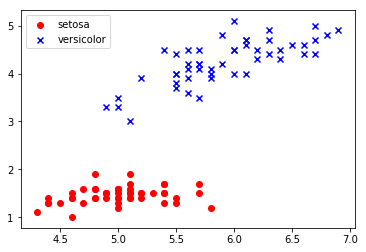

In [2]:
#学習データの表示
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
#irisのデータから正解値（dfの4列目）を取り出す
y = df.iloc[0:100,4].values
#iris-setosaを-1,Iris-virginicaを1に変換
y = np.where(y=='Iris-setosa',-1,1)
#Irisのデータから0行目と2行目をデータとして抽出
X = df.iloc[0:100,[0,2]].values
#品種setosaのプロット（赤の●）
plt.scatter(X[:50,0],X[:50,1],color='red', marker='o',label='setosa')
#品種versicolorのプロット（青の×）
plt.scatter(X[51:100,0],X[51:100,1],color='blue', marker='x',label='versicolor')
#軸のラベルを設定
#plt.xlabel('sepal length[cm]')
#plt.ylabel('petal length[cm]')
#凡例の設定（左上に設定）
plt.legend(loc='upper left')
#図の表示
plt.show()


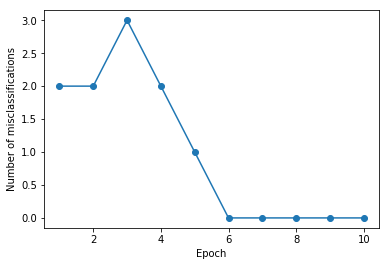

In [3]:
#irisデータをパーセプトロンで学習する

#パーセプトロンのオブジェクトの生成（インスタンス化）
ppn = Perceptron(eta=0.1,n_iter=10)
#トレーニングデータへのモデルの適合
ppn.fit(X,y)
#エポックと誤分類誤差の関係の折れ線グラフをプロット
plt.plot(range(1,len(ppn.errors_) + 1),ppn.errors_,marker='o')
#軸のラベルの設定
plt.xlabel('Epoch')
plt.ylabel('Number of misclassifications')
#図の表示
plt.show()

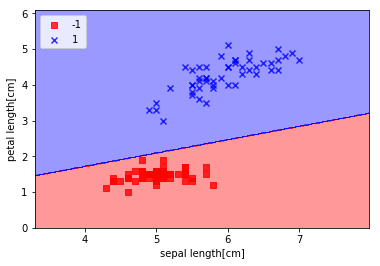

In [6]:
#from graph_writer import graph_writer
import numpy as np
#決定境界をプロット
plot_decision_regions(X,y,classifier=ppn)
#軸のラベルの設定
plt.xlabel('sepal length[cm]')
plt.ylabel('petal length[cm]')
#凡例の設定（左上に設定）
plt.legend(loc='upper left')
plt.show()


### その他の関数

In [5]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier,resolution=0.02):
    #マーカーとカラーマップの準備
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #決定領域をプロット
    x1_min,x1_max = X[:,0].min() - 1,X[:,0].max() + 1
    x2_min,x2_max = X[:,1].min() - 1,X[:,1].max() + 1
    
    #グリッドポイントの生成
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),\
                         np.arange(x2_min,x2_max,resolution))
    
    #各特徴量を1智元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    #予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    #グリッドポイントの等高線をプロット
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    #軸の範囲の設定
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #クラスごとにサンプルをプロット
    #enumerateはindexを返す
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0],y=X[y == cl,1],alpha=0.8,\
                   c=cmap(idx),marker=markers[idx],label=cl)
